Hi all, In this NoteBook I am exploring all the insite of student data set using different plots

In [9]:
# Import all the required liberary
import pandas as pd # load the data
import numpy as np # math operation if needed
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

In [10]:
df = pd.read_csv(r'D:\Final submission\EDA\student\Dataset\StudentsPerformance.csv')

In [11]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


From my observation we can see that there are 8 different columns namely gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course', 'math score', 'reading score','writing score' and this whole dataset is about how the student preform durning there course.

1. gender --> Male or female
2. race/ethnicity --> Student into different groups
3. parental level of education --> How much parents have been studies
4. lunch --> offered by school
5. test preparation course --> Taken coure regaring the test or not
6. math score, reading score, writing score --> score 

In [12]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

# Getting some basic information 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


From the above we can see that there are no null value present and all my dtype is in specific order

In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


From the above we can get the basic insite related to statistical concepts

In [15]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# EDA 

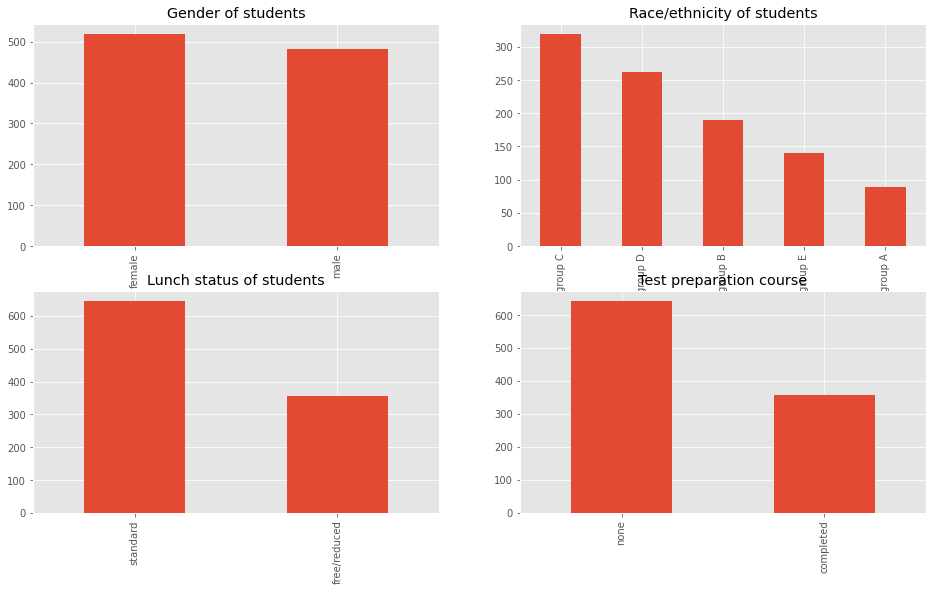

In [31]:
#1. create the subplot and check the count for the following a. gender,b. race/ethnicity,c. lunch, d. test preparation
plt.subplot(221)
df['gender'].value_counts().plot(kind='bar', title='Gender of students', figsize=(16,9))

plt.subplot(222)
df['race/ethnicity'].value_counts().plot(kind='bar', title='Race/ethnicity of students')

plt.subplot(223)
df['lunch'].value_counts().plot(kind='bar', title='Lunch status of students')

plt.subplot(224)
df['test preparation course'].value_counts().plot(kind='bar', title='Test preparation course')


plt.show()

We can get many things from the graph. Let's see the graphs :
1. Gender of student : We can see that female count is more than male
2. Race/ethnicity of students : Student are brodly divided into which set of groups
3. Lunch : Weather the student is getting lunch from home i.e standard and school is providing it.
4. Test Preparation course : we can see the count of studennt that have not select the preparation course. 

In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


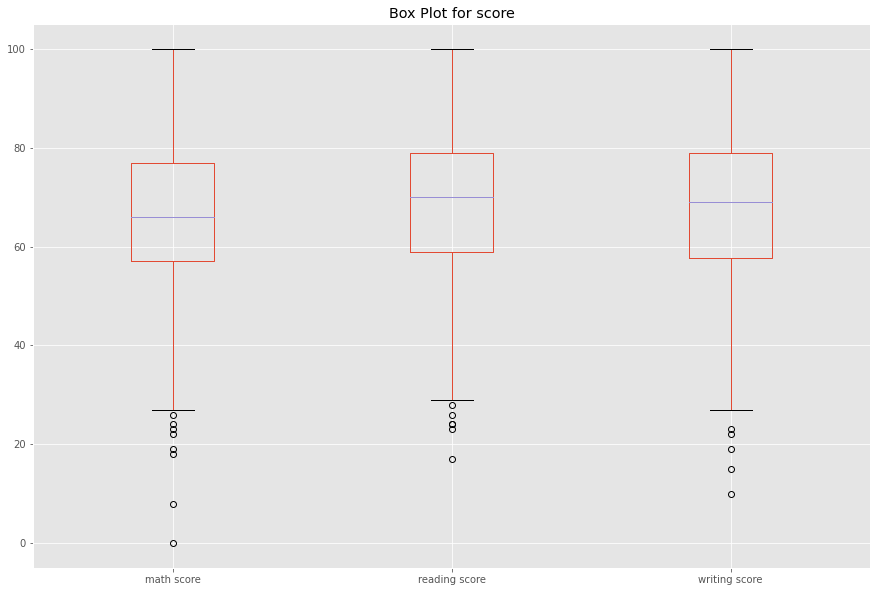

In [18]:
from matplotlib import style

# create a box plot and check 5 number summary for math reading and writing score

style.use('ggplot')
plt.figure(figsize=(15,10))
df[['math score','reading score','writing score']].boxplot()
plt.title('Box Plot for score')
plt.show()


From the above we can see that the box plot is constructed for 3 different score where from that the box plot represent 4 number summary indication min value,maximum value,25%,50%,75% based on our observation we can see that there are few outlier present inside my data.

c:\Users\mksmu\miniconda3\envs\db\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


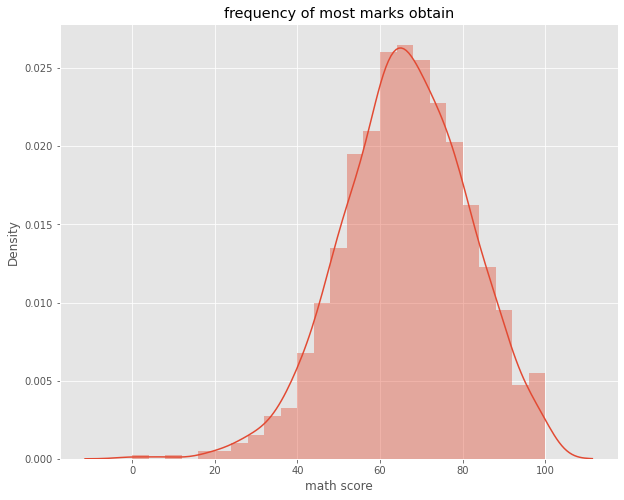

In [19]:
# Create 3 different distribution and check for height frequency distribution
plt.figure(figsize=(10,8))
sns.distplot(df['math score'])
plt.title('frequency of most marks obtain')
plt.savefig('d1')
plt.show()

The graph represents a perfect bell curve closely. The peak is at around 65 marks, the mean of the math score of the students in the dataset. A similar distribution plot can also be made for reading scores and writing scores.

c:\Users\mksmu\miniconda3\envs\db\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


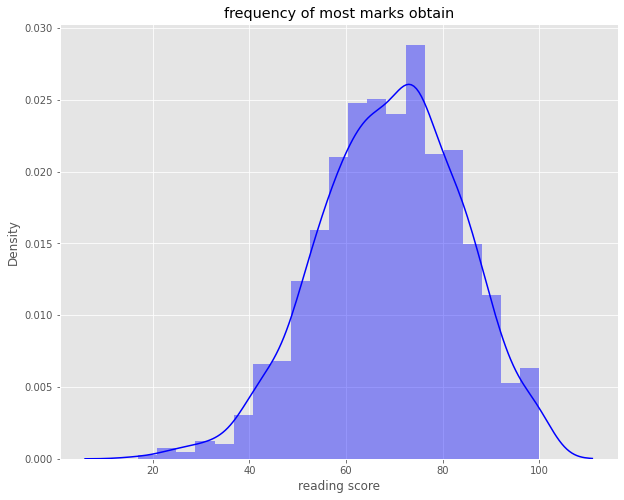

In [20]:
plt.figure(figsize=(10,8))
sns.distplot(df['reading score'],color='b')
plt.title('frequency of most marks obtain')
plt.show()

From the above we can see that most of the marks lie between 50 to 85.

c:\Users\mksmu\miniconda3\envs\db\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


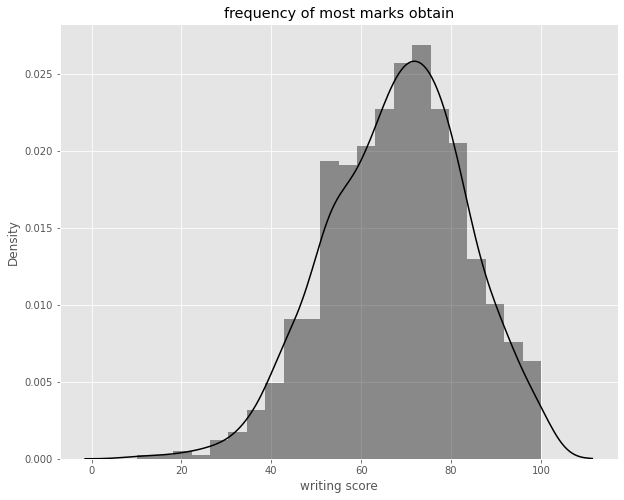

In [21]:
plt.figure(figsize=(10,8))
sns.distplot(df['writing score'],color='k')
plt.title('frequency of most marks obtain')
plt.show()

From the above we can see that most of the marks lie between 50 to 85.

In [22]:
import plotly_express as px

# create a scatter plot and identify the direction in which the data lies

fig = px.scatter(df, x='math score', y='writing score', color='gender')
fig.show()

The graph shows a clear difference in scores between the male and female students. For the same math score, female students are more likely to have a higher writing score than male students. However, for the same writing score, male students are expected to have a higher math score than female students.

In [23]:
# Create a barplot and check who have secured more marks compare to male or female
fig = px.bar(df,x='math score',y='writing score',color='gender')
fig.show()

From the above we can see that Female secure more marks than Male

In [24]:
fig = px.scatter(df, x="math score", y="reading score",symbol='gender',color='gender')
fig.show()


In [25]:
fig = px.bar(df,x='math score',y='reading score',color='gender')
fig.show()

Female are again on the top

In [26]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
# create a pie chart to know what percentage of parent eduction is 

fig = px.pie(df,values='math score',names='race/ethnicity')
fig.show()

From the above we can see that which group student have secure more marks in maths

In [28]:
# create a bar plot and check math score with respect to parental education

fig = px.bar(df,x='math score',y='parental level of education')
fig.show()

From the above we can see that how the math score varies based of parental level of education.

In [29]:
# Check the marks based on course

fig = px.bar(df,x='math score',y='reading score',color='test preparation course')
fig.show()

From the above we can see that people who have completed the course have secure more marks as compare to other.

In [33]:
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [34]:
df['test preparation course'].value_counts().iplot(kind='bar')

In [35]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Summary:

From all the above plot we can see that:

* . What is the height level of perental level of eduction.
* . Score related to different subjects 
* . Chose test perparation cource of not 

# Thank you